<a href="https://colab.research.google.com/github/CarrenP/datamining/blob/main/Carren_0706022210052_Week_6_Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

In [ ]:
bc = pd.read_csv('https://raw.githubusercontent.com/CarrenP/files/refs/heads/main/breast-cancer.csv')
bc.head()

# importing data set dari github dengan tipe file csv dan juga print 10 kolum teratas dari data yang ada.

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
bc.info()

# menunjukan informasi mengenai tabel, dari data type, jumlah data hingga nama kolum.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
bc.describe()

# menampilkan ringkasan statistik dari dataset penguins yang berisi informasi tentang kolom numerik.

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


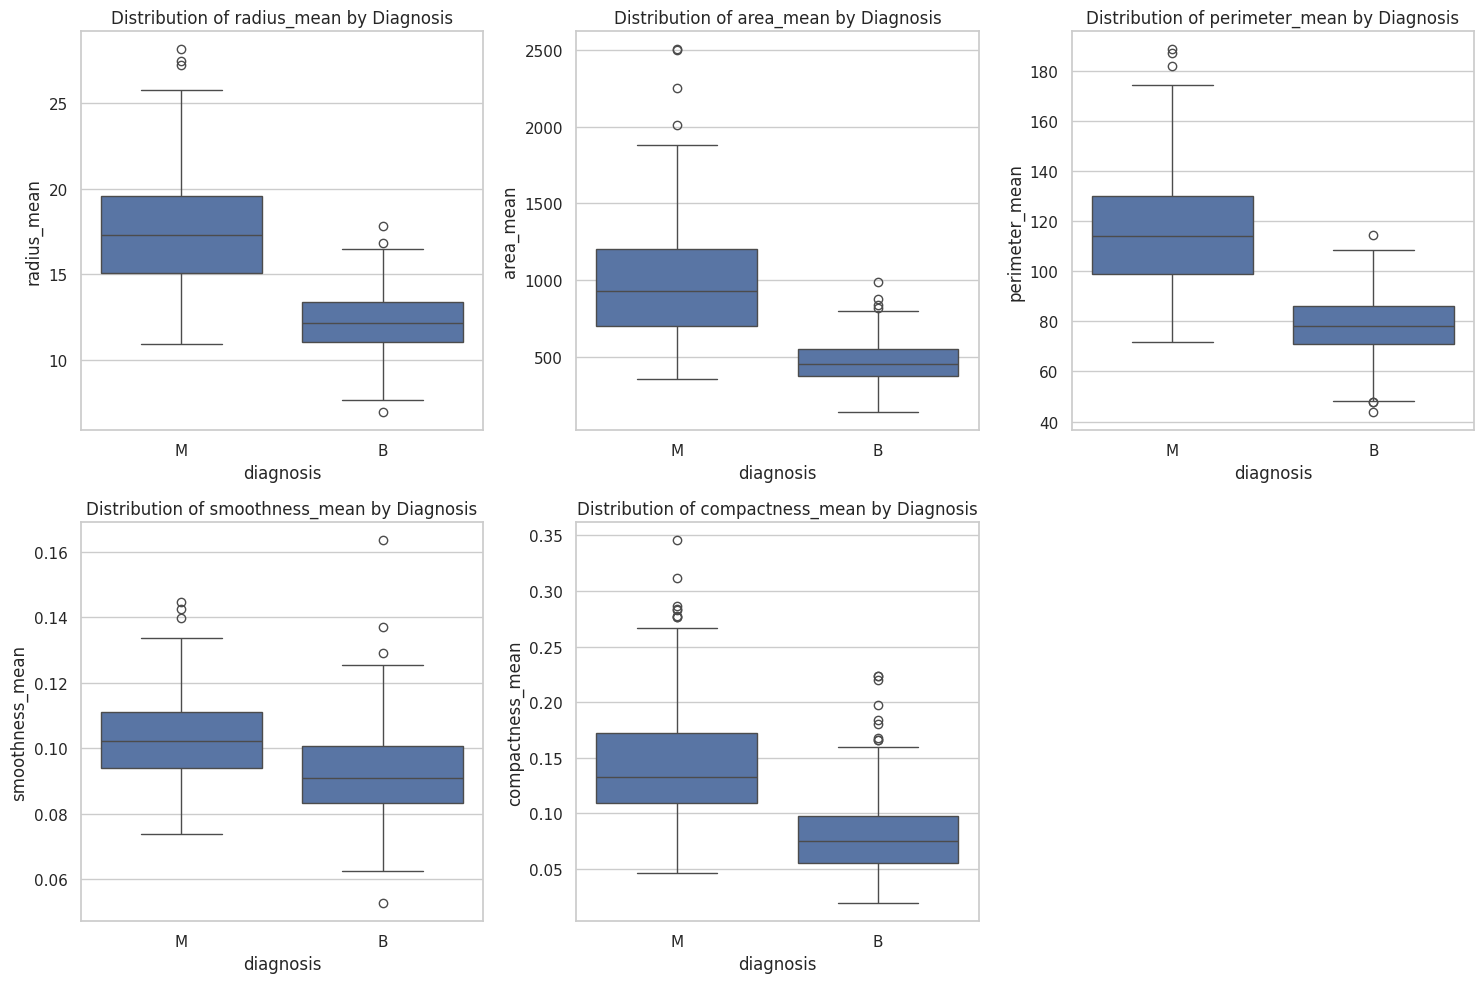

In [ ]:

features = ['radius_mean', 'area_mean', 'perimeter_mean', 'smoothness_mean', 'compactness_mean']

# Set the style of the visualization
sns.set(style="whitegrid")

# Create subplots
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='diagnosis', y=feature, data=bc)
    plt.title(f'Distribution of {feature} by Diagnosis')

plt.tight_layout()
plt.show()

# chart ini menunjukan perbedaan antara kasus malignant and beningn berdasarkan informasi yang ada.

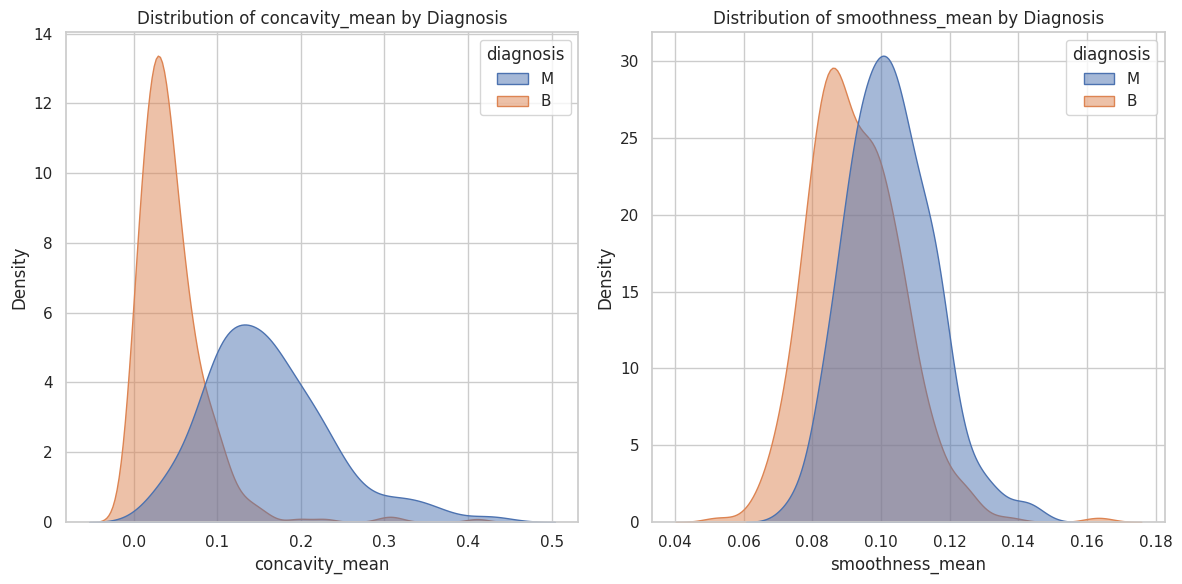

In [ ]:
features = ['concavity_mean', 'smoothness_mean']

# Set the style of the visualization
sns.set(style="whitegrid")

# Create subplots
plt.figure(figsize=(12, 6))
for i, feature in enumerate(features, 1):
    plt.subplot(1, 2, i)
    sns.kdeplot(data=bc, x=feature, hue='diagnosis', fill=True, common_norm=False, alpha=0.5)
    plt.title(f'Distribution of {feature} by Diagnosis')
    plt.xlabel(feature)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

# fitur yang dapat membantu membedakan antara tumor ganas dan jinak.berpotensi menjadi input yang berguna untuk model machine learning yang ditujukan untuk mengklasifikasikan jenis tumor.
# Visualisasi ini memberikan wawasan tentang karakteristik dataset dan potensi hubungan antara fitur dan diagnosis.

In [ ]:
X=bc.drop('diagnosis',axis=1)
y=bc['diagnosis']

# membuat X berisi semua kolom kecuali kolom outcome, dan y berisi kolom species dari DataFrame

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
# membagi dataset, training sebesar 80% dan test sebesar 20%

In [ ]:
X_train.shape,X_test.shape

# menampilkan jumlah baris dan kolum dari variabel X_train dan X-test

((455, 31), (114, 31))

In [ ]:
#Criterion Entropy
#a
clf_entropy = DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=0)

# Fit the model on your training data (X_train, y_train)
clf_entropy.fit(X_train, y_train)

clf_entropy


# membuat, melatih, dan menampilkan model Decision Tree berbasis entropy

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [ ]:
#b
y_pred = clf_entropy.predict(X_test)

accuracy_entropy = accuracy_score(y_test, y_pred)
print(f"Model accuracy score with criterion entropy index: {accuracy_entropy:.4f}")

# melatih, memprediksi, dan menghitung akurasi model Decision Tree menggunakan kriteria entropy index

Model accuracy score with criterion entropy index: 0.9649


In [ ]:
y_train_pred = clf_entropy.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on the test set and calculate accuracy
y_test_pred = clf_entropy.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

# Evaluate if the model is overfitting or underfitting
if train_accuracy > test_accuracy:
    print("The model might be overfitting.")
elif train_accuracy == test_accuracy:
    print("The model is likely to be well-balanced.")
else:
    print("The model might be underfitting.")

#  membandingkan akurasi pelatihan dan akurasi pengujian dari model Decision Tree berbasis Gini yang telah dilatih dan jug amelihat apakh modelnya over atau under fititng

Training accuracy: 0.9802
Test accuracy: 0.9649
The model might be overfitting.


[Text(0.5769230769230769, 0.875, 'x[8] <= 0.051\nentropy = 0.952\nsamples = 455\nvalue = [286, 169]'),
 Text(0.3076923076923077, 0.625, 'x[21] <= 16.83\nentropy = 0.314\nsamples = 282\nvalue = [266, 16]'),
 Text(0.4423076923076923, 0.75, 'True  '),
 Text(0.15384615384615385, 0.375, 'x[14] <= 48.7\nentropy = 0.136\nsamples = 263\nvalue = [258, 5]'),
 Text(0.07692307692307693, 0.125, 'entropy = 0.091\nsamples = 260\nvalue = [257, 3]'),
 Text(0.23076923076923078, 0.125, 'entropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.46153846153846156, 0.375, 'x[2] <= 16.19\nentropy = 0.982\nsamples = 19\nvalue = [8, 11]'),
 Text(0.38461538461538464, 0.125, 'entropy = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.5384615384615384, 0.125, 'entropy = 0.619\nsamples = 13\nvalue = [2, 11]'),
 Text(0.8461538461538461, 0.625, 'x[23] <= 114.45\nentropy = 0.517\nsamples = 173\nvalue = [20, 153]'),
 Text(0.7115384615384615, 0.75, '  False'),
 Text(0.7692307692307693, 0.375, 'x[22] <= 25.655\nentropy = 0.994

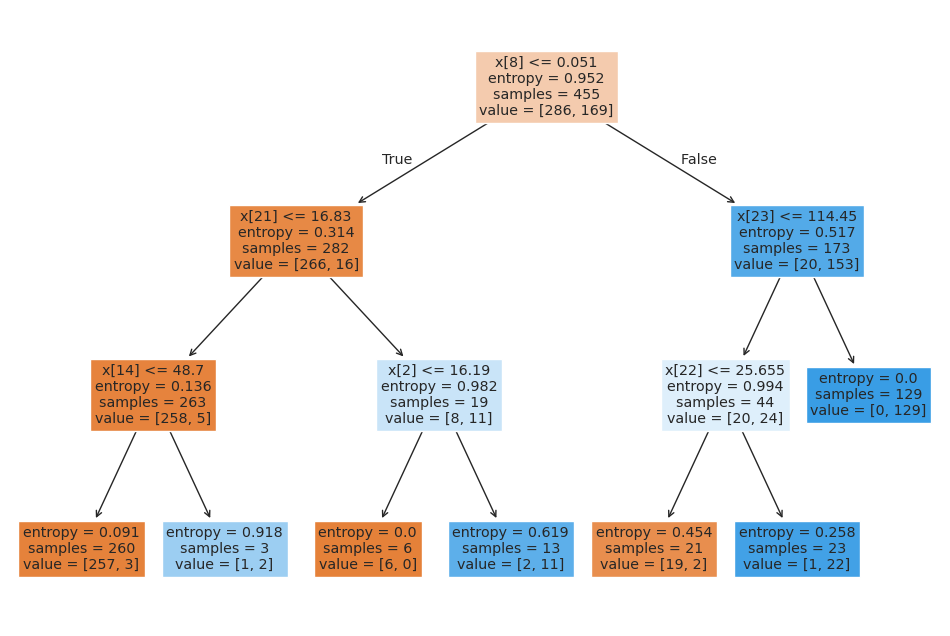

In [ ]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_entropy.fit(X_train, y_train), filled=True)

# menampilkan decision tree berbasis entropy

In [ ]:
#Criterion Entropy
#a
clf_gini = DecisionTreeClassifier(criterion='gini',max_depth=3, random_state=0)

# Fit the model on your training data (X_train, y_train)
clf_gini.fit(X_train, y_train)

clf_gini


# membuat dan melatih model Decision Tree menggunakan Gini index

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
y_pred_gini = clf_gini.predict(X_test)

accuracy_gini = accuracy_score(y_test, y_pred)
print(f"Model accuracy score with criterion entropy index: {accuracy_gini:.4f}")

# print hasil akurasi

Model accuracy score with criterion entropy index: 0.9649


In [ ]:
y_train_pred = clf_gini.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on the test set and calculate accuracy
y_test_pred = clf_gini.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

# Evaluate if the model is overfitting or underfitting
if train_accuracy > test_accuracy:
    print("The model might be overfitting.")
elif train_accuracy == test_accuracy:
    print("The model is likely to be well-balanced.")
else:
    print("The model might be underfitting.")

# menampilkan akurasi dari model Decision Tree

Training accuracy: 0.9780
Test accuracy: 0.9474
The model might be overfitting.


[Text(0.5, 0.875, 'x[8] <= 0.051\ngini = 0.467\nsamples = 455\nvalue = [286, 169]'),
 Text(0.25, 0.625, 'x[21] <= 16.83\ngini = 0.107\nsamples = 282\nvalue = [266, 16]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[14] <= 48.7\ngini = 0.037\nsamples = 263\nvalue = [258, 5]'),
 Text(0.0625, 0.125, 'gini = 0.023\nsamples = 260\nvalue = [257, 3]'),
 Text(0.1875, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.375, 0.375, 'x[2] <= 16.19\ngini = 0.488\nsamples = 19\nvalue = [8, 11]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.4375, 0.125, 'gini = 0.26\nsamples = 13\nvalue = [2, 11]'),
 Text(0.75, 0.625, 'x[28] <= 0.147\ngini = 0.204\nsamples = 173\nvalue = [20, 153]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[23] <= 115.25\ngini = 0.5\nsamples = 35\nvalue = [18, 17]'),
 Text(0.5625, 0.125, 'gini = 0.298\nsamples = 22\nvalue = [18, 4]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(0.875, 0.375, 'x[

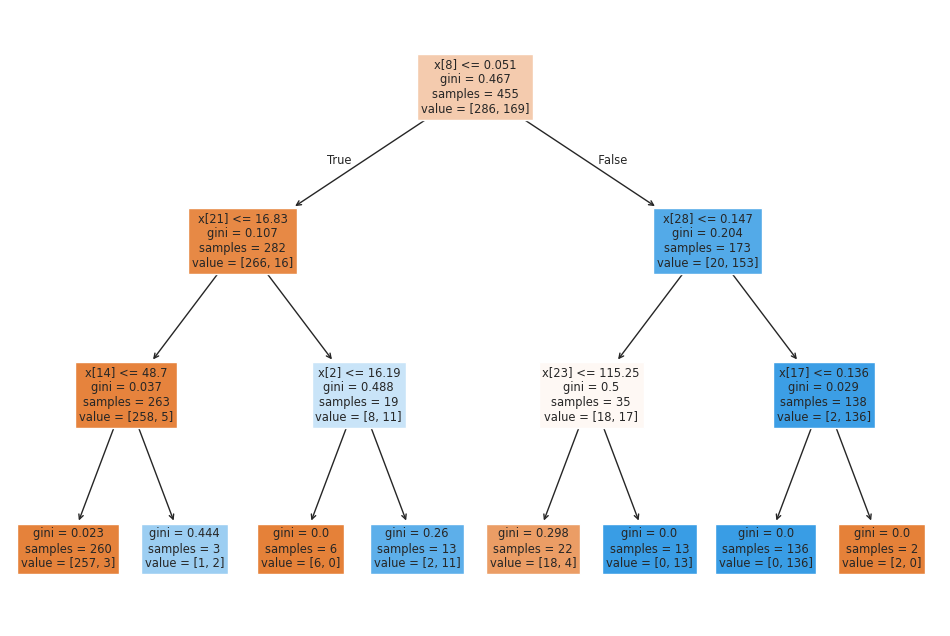

In [ ]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_gini.fit(X_train, y_train), filled=True)
# menapilkan decision tree berbasis gini

In [ ]:
cmatrix = confusion_matrix(y_test, y_pred) #Untuk membuat confusion matrix
print("Confusion Matrix:\n", cmatrix)

cmatrix = confusion_matrix(y_test, y_pred_gini)
print("Confusion Matrix:\n", cmatrix)

# Code ini digunakn untuk mencetak confusion matrix.

Confusion Matrix:
 [[71  0]
 [ 4 39]]
Confusion Matrix:
 [[69  2]
 [ 4 39]]


In [ ]:
report = classification_report(y_test, y_pred)
print("Classification Report Entropy:\n", report)

report = classification_report(y_test, y_pred_gini)
print("Classification Report Gini:\n", report)

# menghasilkan dan menampilkan laporan klasifikasi untuk model Decision Tree entropy dan Gini index

Classification Report Entropy:
               precision    recall  f1-score   support

           B       0.95      1.00      0.97        71
           M       1.00      0.91      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

Classification Report Gini:
               precision    recall  f1-score   support

           B       0.95      0.97      0.96        71
           M       0.95      0.91      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [ ]:
# naive bayes

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# menginstal objek Gaussian Naive Bayes dari pustaka scikit-learn.melatih model Naive Bayes yang telah dibuat

GaussianNB()

In [ ]:
nb_y_pred = nb_classifier.predict(X_test)
# untuk memprediksi label (target) menggunakan model Naive Bayes yang telah dilatih sebelumnya

In [ ]:
cmatrix = confusion_matrix(y_test, nb_y_pred)
print("Confusion Matrix:\n", cmatrix)

#Untuk membuat dan menampilkan confussion matrix dari naive bayes

#d
print('Accuracy Score: {0:0.4f}'.format(accuracy_score(y_test, nb_y_pred)))

# menujukan hasil akurasi

Confusion Matrix:
 [[70  1]
 [43  0]]
Accuracy Score: 0.6140


In [ ]:
#e

print(classification_report(y_test, nb_y_pred))
# menampilkan classification report

              precision    recall  f1-score   support

           B       0.62      0.99      0.76        71
           M       0.00      0.00      0.00        43

    accuracy                           0.61       114
   macro avg       0.31      0.49      0.38       114
weighted avg       0.39      0.61      0.47       114



In [ ]:
# menggunakan logistic regression

#a

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(max_iter=200)
classifier.fit(X_train, y_train)
# melatih model

LogisticRegression(max_iter=200)

In [ ]:
#b

y_pred_log = classifier.predict(X_test)

comparison_table = pd.DataFrame({"y_test": y_test, "y_pred": y_pred_log})

print(comparison_table.head())

# Membuat prediksi dataframe perbandingan dan juga menampilkan 5 row pertama.

    y_test y_pred
204      B      B
70       M      M
131      M      M
431      B      B
540      B      B


In [ ]:
#c

print('Accuracy Score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_log)))
#menampilkan hasil akurasi dari logistic regression

Accuracy Score: 0.9561


In [ ]:
# d

cmatrix = confusion_matrix(y_test, y_pred_log)
print("Confusion Matrix:\n", cmatrix)
# menampilkan confusion matrix

Confusion Matrix:
 [[70  1]
 [ 4 39]]


In [34]:
# e

print (classification_report (y_test, y_pred_log))
# menampilkan classification report

              precision    recall  f1-score   support

           B       0.95      0.99      0.97        71
           M       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



conclusion:

Logistic Regression jauh lebih unggul daripada Naive Bayes untuk dataset ini, dengan akurasi tinggi dan performa yang seimbang dalam mendeteksi kedua kelas ('B' dan 'M'). Sebaliknya, Naive Bayes hampir tidak bisa mendeteksi kelas 'M', membuatnya tidak cocok untuk dataset ini. Oleh karena itu, Logistic Regression adalah model yang lebih andal dan efektif untuk kasus ini.